<a href="https://colab.research.google.com/github/sai14karthik/Soft-Computing-/blob/main/AP21110010310_SC_LAB8.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import os

path="/kaggle/input/pizza-steak-image-classification-dataset"

for dirpath, dirnames, filenames in os.walk("/kaggle/input/pizza-steak-image-classification-dataset/pizza_steak"):
  print(f"There are {len(dirnames)} directories and {len(filenames)} images in '{dirpath}'.")

There are 2 directories and 0 images in '/kaggle/input/pizza-steak-image-classification-dataset/pizza_steak'.
There are 2 directories and 0 images in '/kaggle/input/pizza-steak-image-classification-dataset/pizza_steak/test'.
There are 0 directories and 250 images in '/kaggle/input/pizza-steak-image-classification-dataset/pizza_steak/test/steak'.
There are 0 directories and 250 images in '/kaggle/input/pizza-steak-image-classification-dataset/pizza_steak/test/pizza'.
There are 2 directories and 0 images in '/kaggle/input/pizza-steak-image-classification-dataset/pizza_steak/train'.
There are 0 directories and 750 images in '/kaggle/input/pizza-steak-image-classification-dataset/pizza_steak/train/steak'.
There are 0 directories and 750 images in '/kaggle/input/pizza-steak-image-classification-dataset/pizza_steak/train/pizza'.


# AP21110010310 N. Sai Karthik

Write a python Programming to realize the working principles of popular architectures such as AlexNet, GoogleNet and VGG Net

In [ ]:
import pathlib

# Get the class names
data_dir = pathlib.Path("/kaggle/input/pizza-steak-image-classification-dataset/pizza_steak/train") # turn our training path into a Python path
class_names = np.array(sorted([item.name for item in data_dir.glob('*')])) # created a list of class_names from the subdirectories
print(class_names)

['pizza' 'steak']


Image shape: (512, 512, 3)


(512, 512, 3)

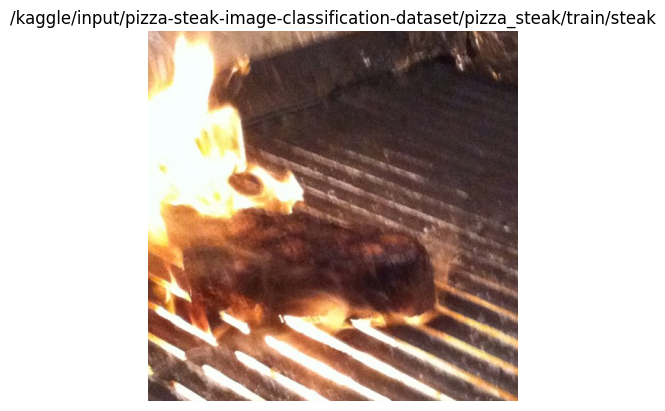

In [ ]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import random

def view_random_image(target_dir, target_class):
  # Setup target directory (we'll view images from here)
  target_folder = os.path.join(target_dir, target_class)

  # Get a random image path
  random_image = random.sample(os.listdir(target_folder), 1)

  # Read in the image and plot it using matplotlib
  img = mpimg.imread(target_folder + "/" + random_image[0])
  plt.imshow(img)
  plt.title(target_class)
  plt.axis("off");

  print(f"Image shape: {img.shape}") # show the shape of the image

  return img

# View a random image from the training dataset
img = view_random_image(target_dir="/kaggle/input/pizza-steak-image-classification-dataset/pizza_steak/train",
                        target_class="/kaggle/input/pizza-steak-image-classification-dataset/pizza_steak/train/steak")

# View the img (actually just a big array/tensor)
img

# View the image shape
img.shape

In [ ]:
# Get all the pixel values between 0 & 1
img/255

array([[[0.90196078, 0.77254902, 0.71372549],
        [0.87843137, 0.74901961, 0.69019608],
        [0.8745098 , 0.74509804, 0.68627451],
        ...,
        [0.30980392, 0.21960784, 0.18823529],
        [0.32941176, 0.23921569, 0.20784314],
        [0.35686275, 0.26666667, 0.23529412]],

       [[0.89803922, 0.76862745, 0.70980392],
        [0.88235294, 0.75294118, 0.69411765],
        [0.88235294, 0.75294118, 0.69411765],
        ...,
        [0.3254902 , 0.23529412, 0.20392157],
        [0.3372549 , 0.24705882, 0.21568627],
        [0.34901961, 0.25882353, 0.22745098]],

       [[0.88235294, 0.75294118, 0.69411765],
        [0.87843137, 0.74901961, 0.69019608],
        [0.88627451, 0.74509804, 0.68235294],
        ...,
        [0.32941176, 0.23921569, 0.20784314],
        [0.31764706, 0.22745098, 0.19607843],
        [0.30196078, 0.21176471, 0.18039216]],

       ...,

       [[0.42352941, 0.32941176, 0.31372549],
        [0.37254902, 0.27843137, 0.2627451 ],
        [0.35686275, 0

In [ ]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Set the seed
tf.random.set_seed(42)

# Preprocess data (get all of the pixel values between 1 and 0, also called scaling/normalization)
train_datagen = ImageDataGenerator(rescale=1./255)
valid_datagen = ImageDataGenerator(rescale=1./255)

# Setup the train and test directories
train_dir = "/kaggle/input/pizza-steak-image-classification-dataset/pizza_steak/train"
test_dir = "/kaggle/input/pizza-steak-image-classification-dataset/pizza_steak/test"

# Import data from directories and turn it into batches
train_data = train_datagen.flow_from_directory(train_dir,
                                               batch_size=32, # number of images to process at a time
                                               target_size=(224, 224), # convert all images to be 224 x 224
                                               class_mode="binary", # type of problem we're working on
                                               seed=42)

valid_data = valid_datagen.flow_from_directory(test_dir,
                                               batch_size=32,
                                               target_size=(224, 224),
                                               class_mode="binary",
                                               seed=42)

# Create a CNN model
model_1 = tf.keras.models.Sequential([
  tf.keras.layers.Conv2D(filters=10,
                         kernel_size=3, # can also be (3, 3)
                         activation="relu",
                         input_shape=(224, 224, 3)), # first layer specifies input shape (height, width, colour channels)
  tf.keras.layers.Conv2D(10, 3, activation="relu"),
  tf.keras.layers.MaxPool2D(pool_size=2, # pool_size can also be (2, 2)
                            padding="valid"), # padding can also be 'same'
  tf.keras.layers.Conv2D(10, 3, activation="relu"),
  tf.keras.layers.Conv2D(10, 3, activation="relu"), # activation='relu' == tf.keras.layers.Activations(tf.nn.relu)
  tf.keras.layers.MaxPool2D(2),
  tf.keras.layers.Flatten(),
  tf.keras.layers.Dense(1, activation="sigmoid") # binary activation output
])

# Compile the model
model_1.compile(loss="binary_crossentropy",
              optimizer=tf.keras.optimizers.Adam(),
              metrics=["accuracy"])

# Fit the model
history_1 = model_1.fit(train_data,
                        epochs=5,
                        steps_per_epoch=len(train_data),
                        validation_data=valid_data,
                        validation_steps=len(valid_data))

Found 1500 images belonging to 2 classes.
Found 500 images belonging to 2 classes.
Epoch 1/5
47/47 [==============================] - 59s 1s/step - loss: 0.5865 - accuracy: 0.6780 - val_loss: 0.4655 - val_accuracy: 0.7680
Epoch 2/5
47/47 [==============================] - 57s 1s/step - loss: 0.4293 - accuracy: 0.8093 - val_loss: 0.3782 - val_accuracy: 0.8380
Epoch 3/5
47/47 [==============================] - 57s 1s/step - loss: 0.4121 - accuracy: 0.8173 - val_loss: 0.3637 - val_accuracy: 0.8520
Epoch 4/5
47/47 [==============================] - 57s 1s/step - loss: 0.3691 - accuracy: 0.8500 - val_loss: 0.3397 - val_accuracy: 0.8640
Epoch 5/5
47/47 [==============================] - 57s 1s/step - loss: 0.3441 - accuracy: 0.8500 - val_loss: 0.3336 - val_accuracy: 0.8640


In [ ]:
# Check out the layers in our model
model_1.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 222, 222, 10)      280       
                                                                 
 conv2d_1 (Conv2D)           (None, 220, 220, 10)      910       
                                                                 
 max_pooling2d (MaxPooling2  (None, 110, 110, 10)      0         
 D)                                                              
                                                                 
 conv2d_2 (Conv2D)           (None, 108, 108, 10)      910       
                                                                 
 conv2d_3 (Conv2D)           (None, 106, 106, 10)      910       
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 53, 53, 10)        0         
 g2D)                                                   

In [ ]:
# Create ImageDataGenerator training instance with data augmentation
train_datagen_augmented = ImageDataGenerator(rescale=1/255.,
                                             rotation_range=20, # rotate the image slightly between 0 and 20 degrees (note: this is an int not a float)
                                             shear_range=0.2, # shear the image
                                             zoom_range=0.2, # zoom into the image
                                             width_shift_range=0.2, # shift the image width ways
                                             height_shift_range=0.2, # shift the image height ways
                                             horizontal_flip=True) # flip the image on the horizontal axis

# Create ImageDataGenerator training instance without data augmentation
train_datagen = ImageDataGenerator(rescale=1/255.)

# Create ImageDataGenerator test instance without data augmentation
test_datagen = ImageDataGenerator(rescale=1/255.)

In [ ]:
# Create non-augmented data batches
print("Non-augmented training images:")
train_data = train_datagen.flow_from_directory(train_dir,
                                               target_size=(224, 224),
                                               batch_size=32,
                                               class_mode='binary',
                                               shuffle=True)

# Import data and augment it from training directory
print("Augmented training images:")
train_data_augmented = train_datagen_augmented.flow_from_directory(train_dir,
                                                                   target_size=(224, 224),
                                                                   batch_size=32,
                                                                   class_mode='binary',
                                                                   shuffle=True)

print("Unchanged test images:")
test_data = test_datagen.flow_from_directory(test_dir,
                                             target_size=(224, 224),
                                             batch_size=32,
                                             class_mode='binary')


Non-augmented training images:
Found 1500 images belonging to 2 classes.
Augmented training images:
Found 1500 images belonging to 2 classes.
Unchanged test images:
Found 500 images belonging to 2 classes.


In [ ]:
from tensorflow.keras.layers import Dropout

model_2 = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(filters=10,
                           kernel_size=3,
                           activation="relu",
                           input_shape=(224, 224, 3)),
    tf.keras.layers.Conv2D(10, 3, activation="relu"),
    tf.keras.layers.MaxPool2D(pool_size=2, padding="valid"),

    tf.keras.layers.Conv2D(10, 3, activation="relu"),
    tf.keras.layers.Conv2D(10, 3, activation="relu"),
    tf.keras.layers.MaxPool2D(2),

    # Add another dropout layer after the second convolutional layer
    tf.keras.layers.Dropout(0.5),  # Adjust dropout rate as needed

    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(1, activation="sigmoid")
])

# Compile the model
model_2.compile(loss="binary_crossentropy",
              optimizer=tf.keras.optimizers.Adam(),
              metrics=["accuracy"])

# Fit the model
history_2 = model_2.fit(train_data_augmented,
                        epochs=5,
                        steps_per_epoch=len(train_data_augmented),
                        validation_data=test_data,
                        validation_steps=len(test_data))

Epoch 1/5
47/47 [==============================] - 65s 1s/step - loss: 0.6659 - accuracy: 0.5760 - val_loss: 0.5786 - val_accuracy: 0.6980
Epoch 2/5
47/47 [==============================] - 64s 1s/step - loss: 0.5634 - accuracy: 0.7267 - val_loss: 0.4041 - val_accuracy: 0.8260
Epoch 3/5
47/47 [==============================] - 63s 1s/step - loss: 0.5211 - accuracy: 0.7580 - val_loss: 0.5214 - val_accuracy: 0.7300
Epoch 4/5
47/47 [==============================] - 62s 1s/step - loss: 0.5138 - accuracy: 0.7547 - val_loss: 0.3894 - val_accuracy: 0.8480
Epoch 5/5
47/47 [==============================] - 62s 1s/step - loss: 0.4784 - accuracy: 0.7727 - val_loss: 0.3829 - val_accuracy: 0.8360


In [ ]:
# Plot the validation and training data separately
def plot_loss_curves(history):
  """
  Returns separate loss curves for training and validation metrics.
  """
  loss = history.history['loss']
  val_loss = history.history['val_loss']

  accuracy = history.history['accuracy']
  val_accuracy = history.history['val_accuracy']

  epochs = range(len(history.history['loss']))

  # Plot loss
  plt.plot(epochs, loss, label='training_loss')
  plt.plot(epochs, val_loss, label='val_loss')
  plt.title('Loss')
  plt.xlabel('Epochs')
  plt.legend()

  # Plot accuracy
  plt.figure()
  plt.plot(epochs, accuracy, label='training_accuracy')
  plt.plot(epochs, val_accuracy, label='val_accuracy')
  plt.title('Accuracy')
  plt.xlabel('Epochs')
  plt.legend();

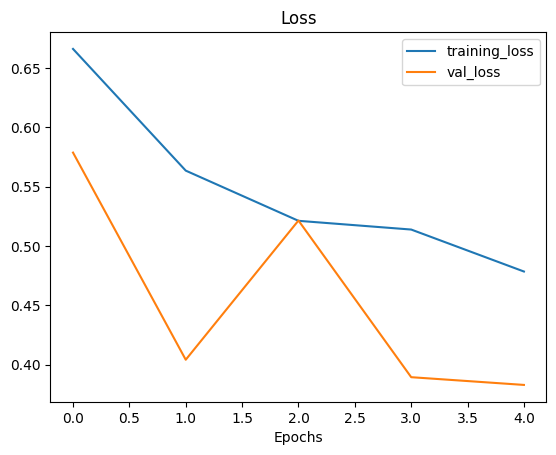

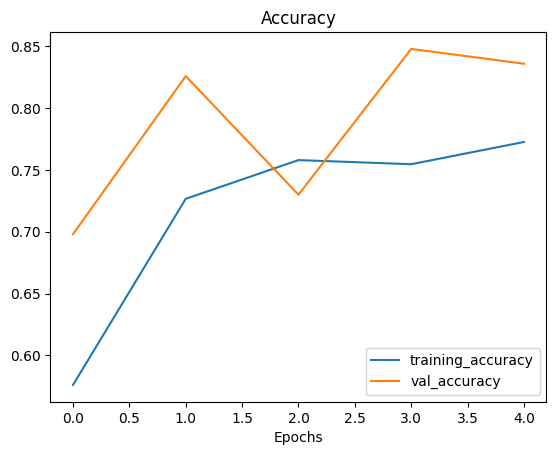

In [ ]:
# Check out the TinyVGG model performance
plot_loss_curves(history_2)

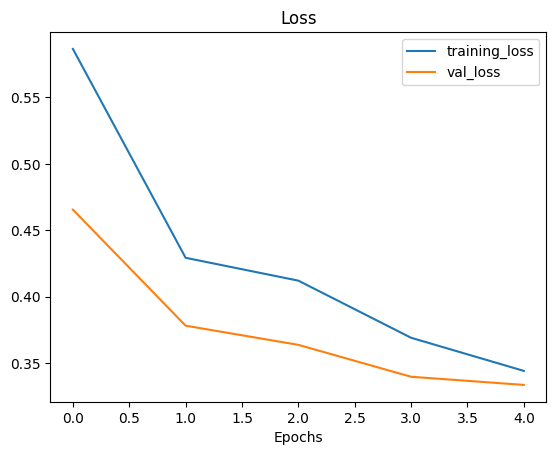

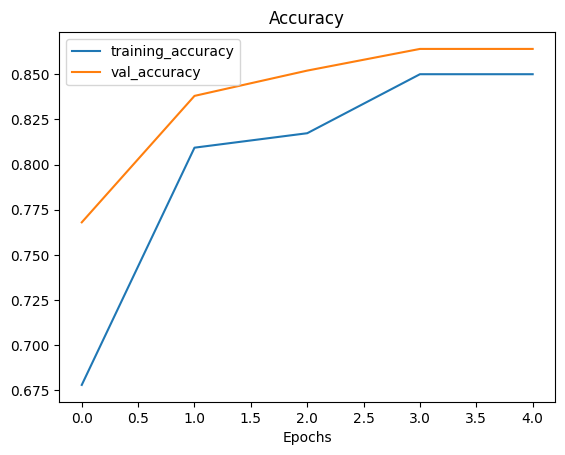

In [ ]:
# How does this training curve look compared to the one above?
plot_loss_curves(history_1)

1/1 [==============================] - 0s 143ms/step
['pizza' 'steak']
Prediction: Pizza


Text(0.5, 1.0, 'Prediction: [[0.40287435]]')

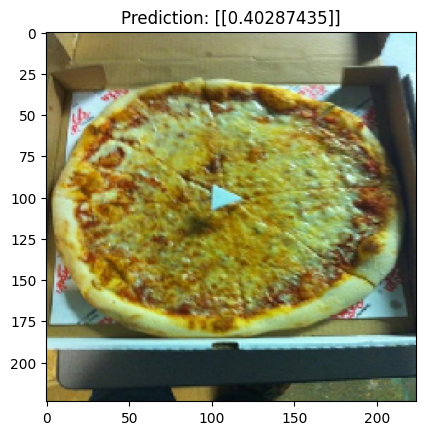

In [ ]:
# Making a prediction with our trained model

from tensorflow.keras.preprocessing import image

# Load and preprocess the new image
img_path = "/kaggle/input/pizza-steak-image-classification-dataset/pizza_steak/test/pizza/106507.jpg"
img = image.load_img(img_path, target_size=(224, 224))
img_array = image.img_to_array(img)
img_array = np.expand_dims(img_array, axis=0)  # Add batch dimension
img_array /= 255.0  # Normalize the image

# Make predictions
predictions = model_2.predict(img_array)

print(class_names)

# Display the results
if predictions[0][0] > 0.5:
    print("Prediction: Steak")
else:
    print("Prediction: Pizza")


plt.imshow(img)
plt.title(f"Prediction: {predictions}")